In [1]:
import seaborn as sns
import plotly.express as px
import numpy as np 
import pandas as pd 


In [2]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv("https://gist.githubusercontent.com/fyyying/4aa5b471860321d7b47fd881898162b7/raw/6907bb3a38bfbb6fccf3a8b1edfb90e39714d14f/titanic_dataset.csv")
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.500,NaN,S
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.500,C104,S
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.750,NaN,Q
812,813,0,2,"Slemen, Mr. Richard James",male,35.0,0,0,28206,10.500,NaN,S
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.450,NaN,S
728,729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.000,NaN,S
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.250,NaN,S
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.000,NaN,S
406,407,0,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.750,NaN,S
246,247,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.0,0,0,347071,7.775,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df['Age']= df['Age'].fillna(df['Age'].median())
df['Fare']= df['Fare'].fillna(df['Fare'].median())
df['Cabin']= df['Cabin'].notnull().astype(int)
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode(dropna=True)[0])


* **`df['Age'] = df['Age'].fillna(df['Age'].median())`**
  → Replaces all missing (`NaN`) values in the **Age** column with the **median age**. The median is used because it’s less affected by outliers than the mean.

* **`df['Fare'] = df['Fare'].fillna(df['Fare'].median())`**
  → Fills missing values in the **Fare** column with the **median fare**, ensuring no empty entries remain.

* **`df['Cabin'] = df['Cabin'].notnull().astype(int)`**
  → Converts the **Cabin** column into a binary indicator:

  * `1` = passenger **has a cabin number**
  * `0` = **missing cabin information**
* **`df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode(dropna=True)[0])`**
This line fills the missing values in the **`Embarked`** column with its **most frequent value** (mode).
Using `[0]` selects the first value from the mode result, ensuring all passengers have a valid embarkation port.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [8]:

print("Percentage of survival by Sex:")
display(df.groupby("Sex")['Survived'].mean() * 100)

print("\nPercentage of survival by Passenger Class (Pclass):")
display(df.groupby("Pclass")['Survived'].mean() * 100)

print("\n Percentage of survival by Embarkation Port:")
display(df.groupby("Embarked")['Survived'].mean() * 100)


Percentage of survival by Sex:


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


Percentage of survival by Passenger Class (Pclass):


Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


 Percentage of survival by Embarkation Port:


Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64

In [9]:
fig = px.histogram(
    df,
    x="Age",
    color="Survived", 
    title="Age Distribution by Survival",
)
fig.update_layout(xaxis_title="Age", yaxis_title="Count")
fig.show()

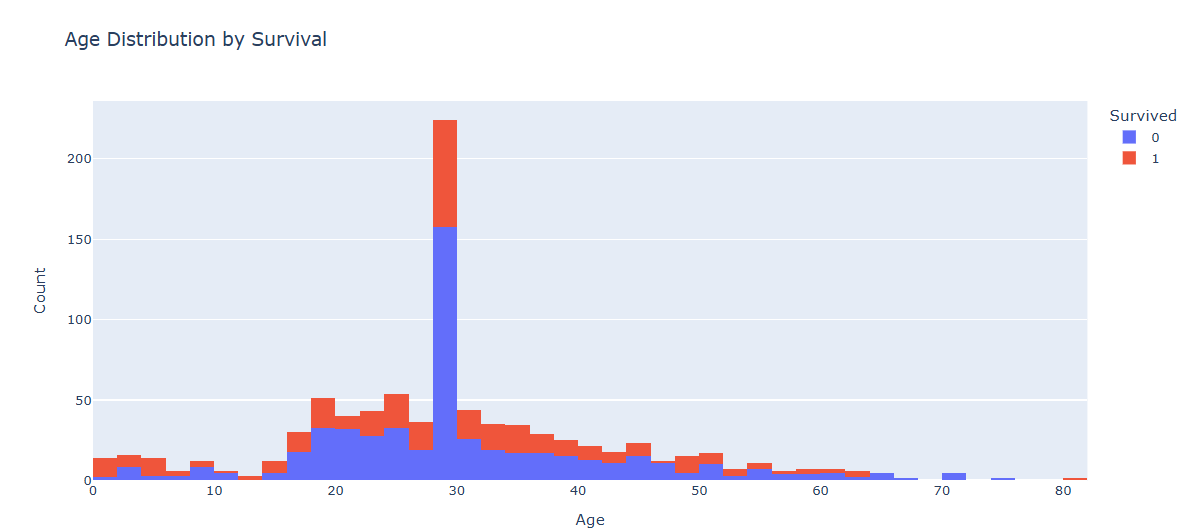

In [10]:
fig = px.bar(df.groupby("Pclass")["Survived"].mean().reset_index(),
            x= "Pclass", y="Survived",
             title = "Survival Rate by ticket class",
             labels = {"Survived": "Survival Rate"}
            )
fig.show()

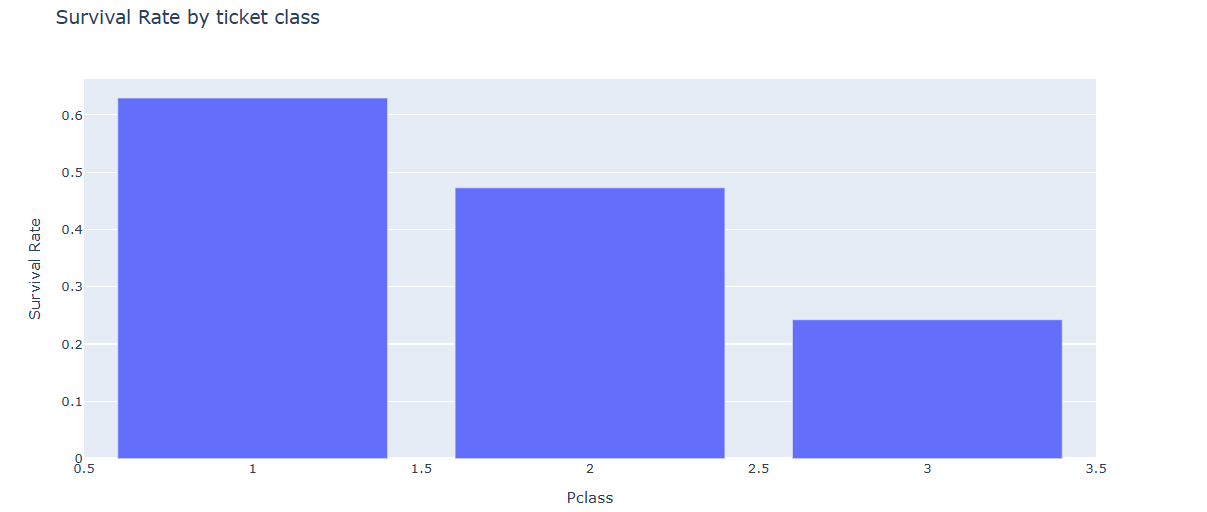

### Insight: Passenger Class
Survival rates decrease sharply from 1st to 3rd class.  
Wealth and cabin location played a major role in survival likelihood.

In [11]:
survival_rate_by_sex = df.groupby('Sex')['Survived'].mean().reset_index()
survival_rate_by_sex['SurvivalRatePercentage'] = (
    survival_rate_by_sex['Survived'] * 100
).round(2).astype(str) + '%'

fig = px.bar(
    survival_rate_by_sex,
    x='Sex',
    y='Survived',
    title='Survival rate by sex',
    labels={'Survived': 'Survival Rate'},
    text='SurvivalRatePercentage'
)
fig.show()

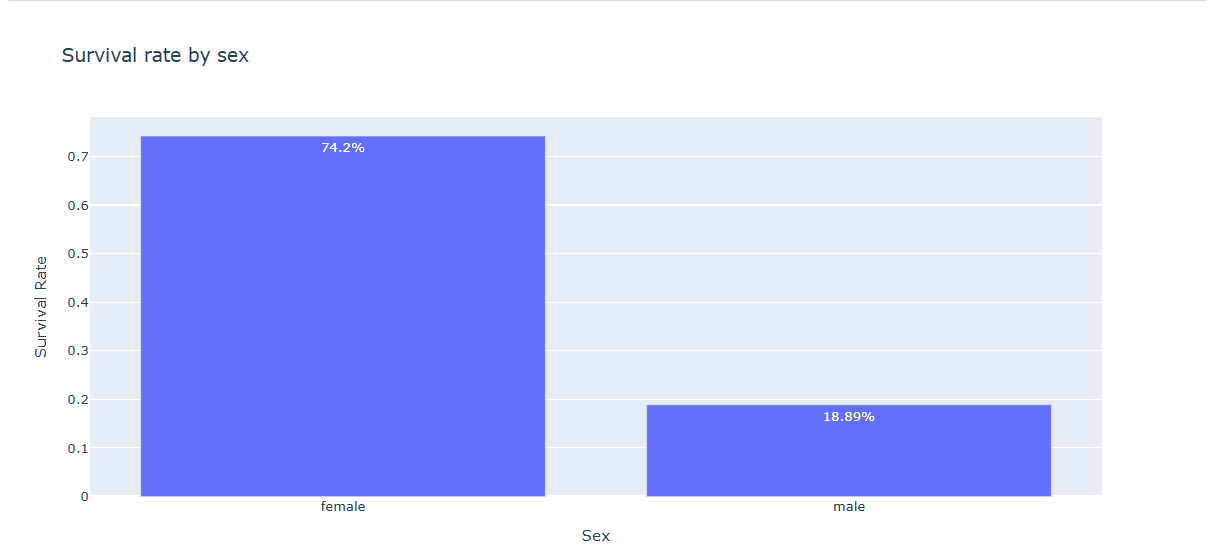

### Insight: Gender
Female passengers were far more likely to survive than male passengers — about 4 out of 5 women survived, compared to only 1 out of 5 men.

### **Reusable Function: Plot Survival Rate by Any Feature**

This function, **`plot_survival_rate_by()`**, allows quick visualization of survival rates for any **categorical column** (e.g., `Sex`, `Pclass`, `Embarked`).

It:

* Calculates the **mean survival rate** for each category.
* Converts it into **percentages** for easier interpretation.
* Displays a **bar chart** with clear labels and consistent 0–100% scale.


In [12]:
def plot_survival_rate_by(feature: str):
    tmp = (
        df.groupby(feature)['Survived'].mean().reset_index()
        .rename(columns={'Survived': 'SurvivalRate'})
        .sort_values('SurvivalRate', ascending=False)
    )
    tmp['SurvivalRatePct'] = (tmp['SurvivalRate'] * 100).round(2)
    tmp['label_pct'] = tmp['SurvivalRatePct'].astype(str) + '%'

    fig = px.bar(
        tmp, x=feature, y='SurvivalRatePct', text='label_pct',
        title=f'Survival Rate by {feature} (%)',
        labels={'SurvivalRatePct': 'Survival Rate (%)', feature: feature}
    )
    fig.update_traces(textposition='outside')
   
    fig.show()

# Examples:
# plot_survival_rate_by('Sex')
# plot_survival_rate_by('Pclass')
# plot_survival_rate_by('Embarked')


In [13]:
plot_survival_rate_by('Embarked')

### Insight: Embarkation Port
Passengers who boarded at Cherbourg (C) had a higher chance of survival, possibly because many were first-class travelers.

In [14]:
df['FareQuartile'] = pd.qcut(df["Fare"],4 , labels = ["Lowest",'Lower-Middle', ' Upper-Middle','Highest'])
df[['Fare','FareQuartile']].sample(10)

,Fare,FareQuartile
702,14.4542,Lower-Middle
138,9.2167,Lower-Middle
504,86.5000,Highest
31,146.5208,Highest
391,7.7958,Lowest
691,13.4167,Lower-Middle
208,7.7500,Lowest
435,120.0000,Highest
685,41.5792,Highest
342,13.0000,Lower-Middle


In [15]:
plot_survival_rate_by('FareQuartile')

### Insight: Fare
Passengers who paid higher fares were more likely to survive, showing a clear link between ticket price and survival probability.


In [16]:
df['AgeGroup']=pd.cut(df["Age"], bins= [0,12,18,60,100], labels= ['child','Teen','Adult','Senior'])
df[["Age",'AgeGroup']].sample(15)

,Age,AgeGroup
454,28.0,Adult
221,27.0,Adult
379,19.0,Adult
335,28.0,Adult
418,30.0,Adult
88,23.0,Adult
532,17.0,Teen
815,28.0,Adult
273,37.0,Adult
81,29.0,Adult


In [17]:
plot_survival_rate_by('AgeGroup')

In [18]:
print(df["AgeGroup"].value_counts())
print(df["AgeGroup"][df["Survived"]==1].value_counts() )

AgeGroup
Adult     730
Teen       70
child      69
Senior     22
Name: count, dtype: int64
AgeGroup
Adult     267
child      40
Teen       30
Senior      5
Name: count, dtype: int64


### Insight: Age
Younger passengers, especially children, were more likely to survive than adults.  
This aligns with the "women and children first" policy.


In [19]:
plot_survival_rate_by('SibSp')

### Insight: Family Size
Survival was highest for passengers traveling with a small family (2–4 members).  
Solo travelers and large families had lower survival rates.

## Summary of Insights

- Women and children had much higher survival rates.  
- First-class passengers survived more often than second or third class.  
- Passengers from Cherbourg had better survival odds than those from Southampton.  
- Higher ticket prices and smaller families were correlated with survival.  

These insights reveal that survival on the Titanic was heavily influenced by **gender, social class, and access to lifeboats**, rather than purely by chance.
